In [1]:
import cv2
import numpy as np
import imutils



# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Downloads/28.mp4')
cnt=0

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

# Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    #removing scorecard
    roi = frame[:800,:]
    
    #cropping center of an image
    thresh=600
    end = roi.shape[1] - thresh
    roi = roi[:,thresh:end]
    cv2.imshow("image",roi)
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

    cv2.imwrite('frames/'+str(cnt)+'.png',roi)
    cnt=cnt+1

  # Break the loop
  else: 
    break
cv2.destroyAllWindows()    

In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import re

#listing down all the file names
frames = os.listdir('Downloads/frames')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

#reading frames
images=[]
for i in frames:
    img = cv2.imread('Downloads/frames'+i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(25,25),0)
    images.append(img)
    
images=np.array(images)

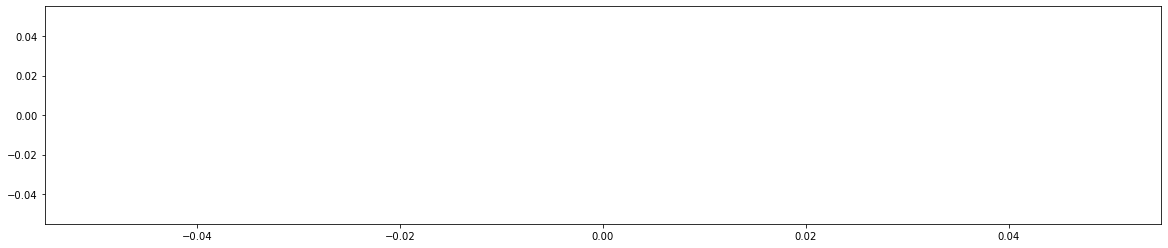

In [10]:
nonzero=[]
for i in range((len(images)-1)):
    
    mask = cv2.absdiff(images[i],images[i+1])
    _ , mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)
    num = np.count_nonzero((mask.ravel()))
    nonzero.append(num)
    
    
x = np.arange(0,len(images)-1)
y = nonzero

plt.figure(figsize=(20,4))
plt.scatter(x,y)

In [8]:

threshold = 15 * 10e3
for i in range(len(images)-1):
    if(nonzero[i]>threshold): 
        scene_change_idx = i
        break
        
frames = frames[:(scene_change_idx + 1)]

NameError: name 'scene_change_idx' is not defined

In [17]:
img= cv2.imread('frames/' + frames[10])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(25,25),0)

plt.figure(figsize=(5,10))
plt.imshow(gray,cmap='gray')

NameError: name 'frames' is not defined

In [18]:
_ , mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(mask,cmap='gray')

NameError: name 'gray' is not defined

In [19]:

image, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

NameError: name 'mask' is not defined

In [20]:

img_copy = np.copy(gray)
cv2.drawContours(img_copy, contours, -1, (0,255,0), 3)
plt.imshow(img_copy, cmap='gray')

NameError: name 'gray' is not defined

In [21]:
!rm -r patch/*

num=20
cnt=0
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    
    numer=min([w,h])
    denom=max([w,h])
    ratio=numer/denom

    if(x>=num and y>=num):
        xmin, ymin= x-num, y-num
        xmax, ymax= x+w+num, y+h+num
    else:
        xmin, ymin=x, y
        xmax, ymax=x+w, y+h

    if(ratio>=0.5 and ((w<=10) and (h<=10)) ):    
        print(cnt,x,y,w,h,ratio)
        cv2.imwrite("patch/"+str(cnt)+".png",img[ymin:ymax,xmin:xmax])
        cnt=cnt+1

'rm' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'contours' is not defined

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
folders=os.listdir('data/')

images=[]
labels= []
for folder in folders:
    files=os.listdir('data/'+folder)
    for file in files:
        img=cv2.imread('data/'+folder+'/'+file,0)
        img=cv2.resize(img,(25,25))
          images.append(img)
        labels.append(int(folder))

images = np.array(images)
features = images.reshape(len(images),-1)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(features,labels, test_size=0.2, stratify=labels,random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(max_depth=3) 
rfc.fit(x_tr,y_tr)

In [ ]:
from sklearn.metrics import classification_report
y_pred = rfc.predict(x_val)
print(classification_report(y_val,y_pred))

In [ ]:
!rm -r ball/*
ball_df = pd.DataFrame(columns=['frame','x','y','w','h'])

for idx in range(len(frames)):
    
    img= cv2.imread('frames/' + frames[idx])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(25, 25),0)
    _ , mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    image, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    !rm -r patch/*

    num=20
    cnt=0
    df = pd.DataFrame(columns=['frame','x','y','w','h'])
    for i in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[i])

        numer=min([w,h])
        denom=max([w,h])
        ratio=numer/denom

        if(x>=num and y>=num):
            xmin, ymin= x-num, y-num
            xmax, ymax= x+w+num, y+h+num
        else:
            xmin, ymin= x,y
             xmax, ymax= x+w, y+h

        if(ratio>=0.5):    
            #print(cnt,x,y,w,h,ratio)
            df.loc[cnt,'frame'] = frames[idx]
            df.loc[cnt,'x']=x
            df.loc[cnt,'y']=y
            df.loc[cnt,'w']=w
            df.loc[cnt,'h']=h
            
            cv2.imwrite("patch/"+str(cnt)+".png",img[ymin:ymax,xmin:xmax])
            cnt=cnt+1
              files=os.listdir('patch/')    
    if(len(files)>0):
    
        files.sort(key=lambda f: int(re.sub('\D', '', f)))

        test=[]
        for file in files:
            img=cv2.imread('patch/'+file,0)
            img=cv2.resize(img,(25,25))
            test.append(img)

        test = np.array(test)
        test = test.reshape(len(test),-1)
        y_pred = rfc.predict(test)
        prob=rfc.predict_proba(test)

        if 0 in y_pred:
            ind = np.where(y_pred==0)[0]
            proba = prob[:,0]
            confidence = proba[ind]
            confidence = [i for i in confidence if i>0.7]
            if(len(confidence)>0):

                maximum = max(confidence)
                ball_file=files[list(proba).index(maximum)]
                test = test.reshape(len(test),-1)
        y_pred = rfc.predict(test)
        prob=rfc.predict_proba(test)

        if 0 in y_pred:
            ind = np.where(y_pred==0)[0]
            proba = prob[:,0]
            confidence = proba[ind]
            confidence = [i for i in confidence if i>0.7]
            if(len(confidence)>0):

                maximum = max(confidence)
                ball_file=files[list(proba).index(maximum)]
                
                
                img= cv2.imread('patch/'+ball_file)
                cv2.imwrite('ball/'+str(frames[idx]),img)

                no = int(ball_file.split(".")[0])
                ball_df.loc[idx]= df.loc[no]
        else:
                ball_df.loc[idx,'frame']=frames[idx]

    else:
            ball_df.loc[idx,'frame']=frames[idx]

In [ ]:
ball_df.dropna(inplace=True)
print(ball_df)


In [ ]:
files = ball_df['frame'].values

num=10
for idx in range(len(files)):
    
    #draw contours 
    img = cv2.imread('frames/'+files[idx])
    
    x=ball_df.loc[idx,'x']
    y=ball_df.loc[idx,'y']
    w=ball_df.loc[idx,'w']
    h=ball_df.loc[idx,'h']
    
    xmin=x-num
    ymin=y-num
    xmax=x+w+num
    ymax=y+h+num
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0), 2)
    cv2.imwrite("frames/"+files[idx],img)      

In [ ]:
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    height, width, layers = img.shape
    size = (width,height)
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('28.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()